#  Sistem Rekomendasi Anime - Reinhart Jens Robert

## Project Overview

Dalam era digital saat ini, jumlah konten hiburan seperti anime terus meningkat pesat. Dengan ribuan judul anime yang tersedia, pengguna sering mengalami kesulitan dalam menemukan anime yang sesuai dengan preferensi mereka. Fenomena ini dikenal sebagai "information overload" dimana terlalu banyak pilihan justru membuat pengambilan keputusan menjadi sulit.
Sistem rekomendasi telah menjadi solusi yang sangat efektif untuk mengatasi masalah ini. Platform seperti Netflix, Crunchyroll, dan MyAnimeList menggunakan sistem rekomendasi untuk membantu pengguna menemukan konten yang relevan dengan preferensi mereka. Hal ini tidak hanya meningkatkan kepuasan pengguna, tetapi juga meningkatkan engagement dan retention pada platform tersebut.
royek ini penting untuk diselesaikan karena:

1. Meningkatkan User Experience: Membantu pengguna menemukan anime yang sesuai dengan preferensi mereka dengan lebih efisien
2. Mengatasi Information Overload: Mengurangi waktu yang dibutuhkan pengguna untuk mencari anime yang menarik
3. Personalisasi: Memberikan rekomendasi yang dipersonalisasi berdasarkan karakteristik anime dan pola preferensi pengguna
4. Business Value: Sistem rekomendasi yang baik dapat meningkatkan engagement dan monetisasi platform


## Business Understanding
Berdasarkan analisis kebutuhan pengguna dan tantangan dalam industri anime streaming, masalah utama yang ingin diselesaikan adalah:

1. Kesulitan Discovery: Bagaimana cara membantu pengguna menemukan anime baru yang sesuai dengan preferensi mereka dari ribuan judul yang tersedia?
2. Personalisasi Rekomendasi: Bagaimana cara memberikan rekomendasi yang dipersonalisasi berdasarkan karakteristik anime (genre, tipe, rating) dan pola preferensi pengguna?
3. Cold Start Problem: Bagaimana cara memberikan rekomendasi yang relevan untuk pengguna baru yang belum memiliki riwayat rating atau preferensi?

**Goals:**
Tujuan dari proyek ini adalah:

1. Mengembangkan sistem rekomendasi hybrid yang dapat memberikan rekomendasi anime yang akurat dan relevan dengan menggabungkan pendekatan Content-Based Filtering dan Collaborative Filtering.
2. Meningkatkan akurasi rekomendasi dengan memanfaatkan informasi konten anime (genre, tipe) dan pola rating pengguna untuk menghasilkan rekomendasi yang lebih personal dan relevan.
3. Mengatasi keterbatasan masing-masing metode dengan memanfaatkan kelebihan dari kedua pendekatan untuk menciptakan sistem yang lebih robust dan komprehensif.

### Solution Approach
Untuk mencapai goals yang telah ditetapkan, proyek ini akan mengimplementasikan dua pendekatan sistem rekomendasi:
1. Content-Based Filtering
Pendekatan ini merekomendasikan anime berdasarkan kesamaan karakteristik konten dengan anime yang disukai pengguna sebelumnya.

Metode yang digunakan:

- TF-IDF Vectorization: Untuk mengubah fitur kategoris (genre, tipe) menjadi representasi numerik
- Cosine Similarity: Untuk mengukur kesamaan antar anime berdasarkan fitur konten

Kelebihan:

- Tidak memerlukan data dari pengguna lain
- Dapat memberikan rekomendasi untuk anime baru (tidak ada cold start problem untuk item)
- Rekomendasi dapat dijelaskan dengan jelas (explainable)

Kekurangan:

- Terbatas pada fitur yang tersedia dalam dataset
- Cenderung memberikan rekomendasi yang similar (lack of diversity)
- Tidak dapat menangkap preferensi pengguna yang kompleks

2. Collaborative Filtering
Pendekatan ini merekomendasikan anime berdasarkan pola rating dan preferensi pengguna yang memiliki selera similar.

Metode yang digunakan:

- Matrix Factorization dengan SVD (Singular Value Decomposition): Untuk mereduksi dimensi dan mengekstrak faktor laten dari user-item matrix
- Synthetic User Generation: Karena dataset tidak memiliki data user rating, akan dibuat synthetic users berdasarkan popularity dan rating anime

Kelebihan:

- Dapat menangkap preferensi kompleks dan pola tersembunyi
- Tidak bergantung pada fitur konten
- Dapat memberikan rekomendasi yang unexpected dan diverse

Kekurangan:

- Memerlukan data rating dari banyak pengguna
- Cold start problem untuk pengguna dan item baru
- Sulit untuk dijelaskan (black box)

3. Hybrid Approach
Menggabungkan kedua pendekatan di atas untuk memanfaatkan kelebihan masing-masing dan mengurangi kelemahan individual.


In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

# Data Understanding
## 1. DATA LOADING DAN EXPLORATORY DATA ANALYSIS

In [3]:
# Load dataset anime
df = pd.read_csv('/content/anime.csv')

# Tampilkan informasi dasar dataset
print("=== INFORMASI DATASET ===")
print(f"Shape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n=== 5 DATA TERATAS ===")
print(df.head())

print("\n=== INFO DATASET ===")
print(df.info())

print("\n=== DESKRIPSI STATISTIK ===")
print(df.describe())

# Cek missing values
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print(f"\nPersentase missing values:")
print((df.isnull().sum() / len(df)) * 100)

# Cek duplikasi
print(f"\n=== DUPLIKASI ===")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

=== INFORMASI DATASET ===
Shape dataset: (12294, 7)
Jumlah baris: 12294
Jumlah kolom: 7

=== 5 DATA TERATAS ===
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

=== INFO DATASET ===
<class 'pand

### Informasi Umum Dataset
1. Dataset terdiri dari 12.294 baris dan 7 kolom, artinya ada 12.294 data anime yang dianalisis.

2. Masing-masing baris merepresentasikan satu judul anime dengan informasi terkait seperti genre, tipe, episode, rating, dan jumlah anggota.

### 5 Data Teratas
1. Contoh data teratas mencakup anime populer seperti Kimi no Na wa., Fullmetal Alchemist: Brotherhood, dan Gintama°, Steins;Gate, Gintama&#039;  

2. Informasi yang diberikan meliputi judul anime, genre, tipe (TV/Movie), jumlah episode, rating, dan jumlah anggota yang menambahkan anime ke daftar mereka.


### Struktur dan Tipe Data
1. Kolom anime_id, members bertipe integer.

2. Kolom rating bertipe float.

3. Kolom name, genre, type, dan episodes bertipe object (teks).

4. Jumlah data kosong (missing values) cukup kecil, hanya ada:

  - 62 nilai kosong pada genre (sekitar 0,5%)

  - 25 nilai kosong pada type (sekitar 0,2%)

  - 230 nilai kosong pada rating (sekitar 1,87%)

5. Tidak ada data duplikat

### Statistik Deskriptif
1. Rating anime memiliki nilai rata-rata sekitar 6.47, dengan minimum 1.67 dan maksimum 10.0.

2. Jumlah anggota sangat bervariasi, dengan median sekitar 1.550, tapi bisa mencapai lebih dari 1 juta pada anime yang sangat populer.

3. Distribusi members menunjukkan banyak anime yang kurang dikenal (dengan sedikit anggota) dan segelintir anime yang sangat populer.

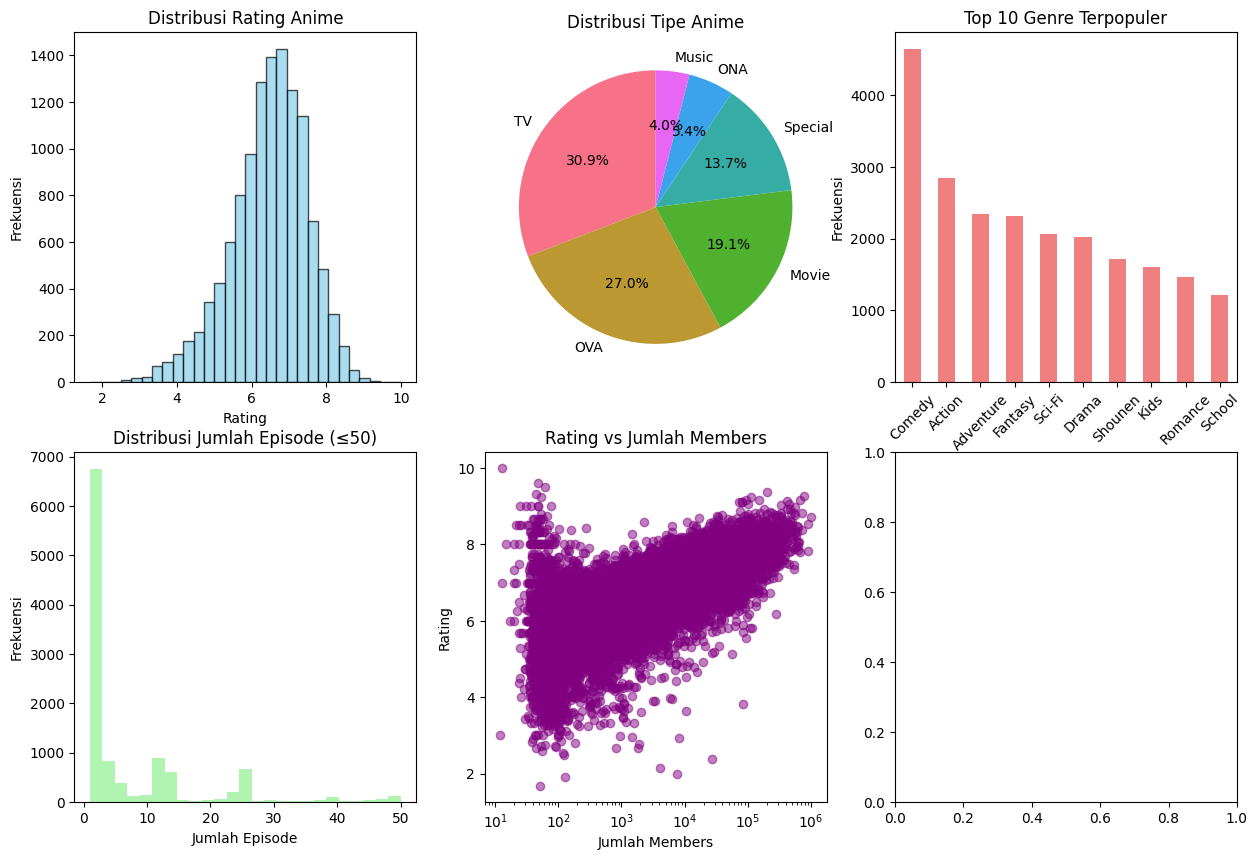

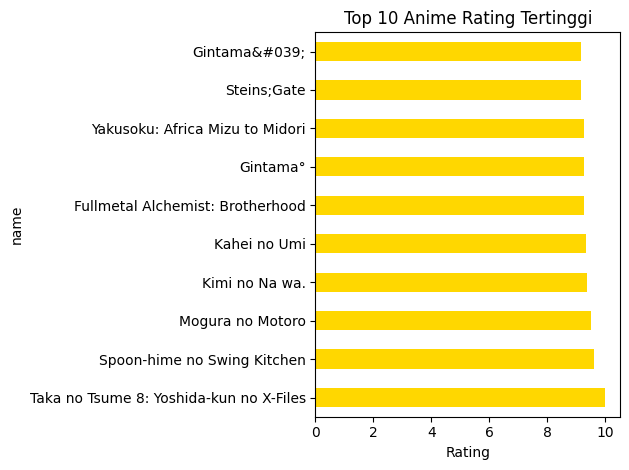

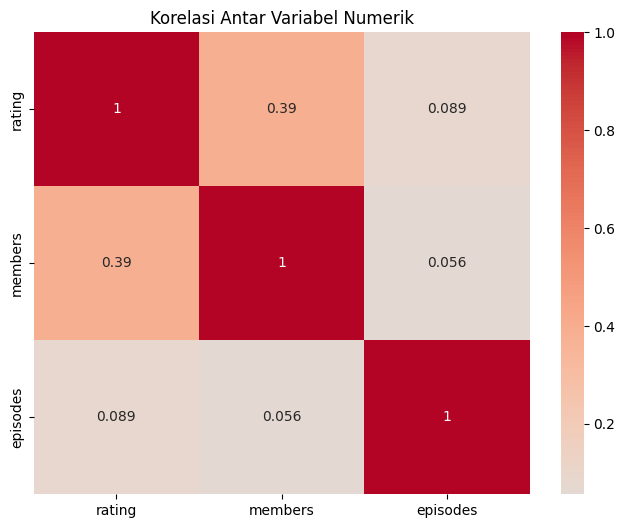

In [4]:
# Analisis distribusi rating
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['rating'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

# Analisis distribusi tipe anime
plt.subplot(2, 3, 2)
type_counts = df['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Tipe Anime')

# Top 10 genre terpopuler
plt.subplot(2, 3, 3)
# Split genre dan hitung frekuensi
all_genres = []
for genres in df['genre'].dropna():
    genre_list = [genre.strip() for genre in str(genres).split(',')]
    all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Genre Terpopuler')
plt.xlabel('Genre')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Distribusi jumlah episode
plt.subplot(2, 3, 4)
episodes_clean = df[df['episodes'] != 'Unknown']['episodes'].astype(int)
plt.hist(episodes_clean[episodes_clean <= 50], bins=25, alpha=0.7, color='lightgreen')
plt.title('Distribusi Jumlah Episode (≤50)')
plt.xlabel('Jumlah Episode')
plt.ylabel('Frekuensi')

# Scatter plot rating vs members
plt.subplot(2, 3, 5)
plt.scatter(df['members'], df['rating'], alpha=0.5, color='purple')
plt.xlabel('Jumlah Members')
plt.ylabel('Rating')
plt.title('Rating vs Jumlah Members')
plt.xscale('log')

# Top 10 anime dengan rating tertinggi
plt.subplot(2, 3, 6)
top_rated = df.nlargest(10, 'rating')[['name', 'rating']].set_index('name')
top_rated.plot(kind='barh', color='gold', legend=False)
plt.title('Top 10 Anime Rating Tertinggi')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

# Analisis korelasi numerik
numeric_cols = ['rating', 'members']
episodes_numeric = pd.to_numeric(df['episodes'], errors='coerce')
corr_data = pd.DataFrame({'rating': df['rating'], 'members': df['members'], 'episodes': episodes_numeric})

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

1. Distribusi Rating Anime
Mayoritas anime memiliki rating antara 6 dan 7, membentuk distribusi normal.

2. Distribusi Tipe Anime
Tipe anime paling banyak adalah TV (30.9%), disusul OVA (27%) dan Movie (19.1%).

3. Top 10 Genre Terpopuler
Genre paling populer adalah Comedy, diikuti Action dan Adventure.

4. Distribusi Jumlah Episode (≤50)
Kebanyakan anime memiliki jumlah episode sedikit, terutama di bawah 10 episode.

5. Rating vs Jumlah Members
Terdapat kecenderungan bahwa anime dengan lebih banyak anggota cenderung memiliki rating yang lebih tinggi.
6. Top 10 Anime Rating Tertinggi
Anime dengan rating tertinggi adalah Gintama, Steins;Gate, dan Yakusoku: Africa Mizu to Midori.

7. Korelasi Antar Variabel Numerik
Terdapat korelasi sedang antara rating dan jumlah members (0.39), sedangkan korelasi dengan jumlah episode sangat lemah.

# 3. DATA PREPARATION
### 3.1 Data Cleaning
Membersihkan data dan menangani missing values untuk persiapan modeling.

In [5]:
# Membuat copy dataset untuk preprocessing
df_clean = df.copy()

# 1. Handle missing values
print(f"Missing values sebelum cleaning: {df_clean.isnull().sum().sum()}")

# Drop baris dengan rating kosong (penting untuk collaborative filtering)
df_clean = df_clean.dropna(subset=['rating'])

# Fill missing genre dengan 'Unknown'
df_clean['genre'] = df_clean['genre'].fillna('Unknown')

# Handle episodes 'Unknown'
df_clean['episodes_numeric'] = pd.to_numeric(df_clean['episodes'], errors='coerce')
df_clean['episodes_numeric'] = df_clean['episodes_numeric'].fillna(df_clean['episodes_numeric'].median())

print(f"Missing values setelah cleaning: {df_clean.isnull().sum().sum()}")

# 2. Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f"Shape setelah remove duplicates: {df_clean.shape}")

# 3. Filter data dengan members minimal (untuk mengurangi noise)
min_members = 1000  # Threshold minimal members
df_clean = df_clean[df_clean['members'] >= min_members]
print(f"Shape setelah filter minimal members ({min_members}): {df_clean.shape}")

# 4. Normalisasi rating (jika diperlukan untuk beberapa algoritma)
df_clean['rating_normalized'] = (df_clean['rating'] - df_clean['rating'].min()) / (df_clean['rating'].max() - df_clean['rating'].min())

# 5. Prepare content features untuk content-based filtering
# Gabungkan genre dan type sebagai features
df_clean['content_features'] = df_clean['genre'].astype(str) + ' ' + df_clean['type'].astype(str)

print("Data preparation selesai!")
print(f"Final dataset shape: {df_clean.shape}")

Missing values sebelum cleaning: 317
Missing values setelah cleaning: 0
Shape setelah remove duplicates: (12064, 8)
Shape setelah filter minimal members (1000): (6791, 8)
Data preparation selesai!
Final dataset shape: (6791, 10)


1. Handle Missing Values (Menangani Data Kosong)
- Awalnya terdapat 317 data kosong di seluruh kolom.

- Baris dengan nilai rating kosong dihapus karena rating penting untuk sistem rekomendasi (misalnya collaborative filtering).

- Nilai kosong pada kolom genre diisi dengan string "Unknown".

- Kolom episodes yang berisi teks seperti "Unknown" dikonversi ke numerik (episodes_numeric), lalu nilai yang tidak bisa dikonversi (NaN) diganti dengan median dari kolom tersebut.

- Setelah ini, tidak ada lagi missing values.

2. Remove Duplicates (Menghapus Duplikasi)
- Dilakukan penghapusan baris duplikat agar tidak mengganggu proses analisis.

- Setelah proses ini, jumlah data menjadi 12.064 baris dan 8 kolom.

3. Filter Berdasarkan Jumlah Members
- Data difilter agar hanya menyertakan anime yang memiliki minimal 1000 members, untuk menghindari data yang terlalu jarang dinilai.

- Setelah filter ini, jumlah data berkurang menjadi 6.791 baris.

4. Normalisasi Rating
- Kolom rating dinormalisasi ke skala 0–1, yang berguna untuk algoritma yang sensitif terhadap skala (seperti KNN atau cosine similarity).

- Hasilnya disimpan di kolom baru: rating_normalized.

5. Membuat Fitur Konten (Content Features)
- Untuk keperluan content-based filtering, dibuat fitur content_features dengan menggabungkan isi kolom genre dan type menjadi satu string teks.

- Ini mempermudah transformasi teks ke vektor fitur seperti TF-IDF.

Output Akhir
- Setelah semua proses, dataset akhir memiliki bentuk (shape): 6.791 baris dan 10 kolom.

- Artinya, data kini bersih, terfilter, dan siap dipakai untuk model rekomendasi baik berbasis konten maupun kolaboratif.

# Modeling

##  CONTENT-BASED FILTERING
Content-Based Filtering merekomendasikan item berdasarkan kesamaan karakteristik/fitur dari item tersebut.
Dalam kasus ini, kita akan menggunakan genre sebagai fitur utama untuk menghitung kesamaan antar anime.



In [6]:
class ContentBasedRecommender:
    def __init__(self):
        self.tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
        self.cosine_sim = None
        self.anime_data = None

    def fit(self, data):
        """Train the content-based model"""
        self.anime_data = data.reset_index(drop=True)

        # Create TF-IDF matrix dari content features
        tfidf_matrix = self.tfidf.fit_transform(self.anime_data['content_features'])

        # Hitung cosine similarity
        self.cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

        print(f"Content-based model trained dengan {len(self.anime_data)} anime")

    def get_recommendations(self, anime_name, top_n=10):
        """Get recommendations berdasarkan nama anime"""
        try:
            # Cari index anime
            idx = self.anime_data[self.anime_data['name'] == anime_name].index[0]

            # Get similarity scores
            sim_scores = list(enumerate(self.cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Get top N recommendations (exclude anime itu sendiri)
            sim_scores = sim_scores[1:top_n+1]
            anime_indices = [i[0] for i in sim_scores]

            recommendations = self.anime_data.iloc[anime_indices][['name', 'genre', 'type', 'rating', 'members']].copy()
            recommendations['similarity_score'] = [score[1] for score in sim_scores]

            return recommendations

        except IndexError:
            print(f"Anime '{anime_name}' tidak ditemukan dalam dataset")
            return None

# Initialize dan train content-based recommender
cb_recommender = ContentBasedRecommender()
cb_recommender.fit(df_clean)

# Test content-based recommendations
test_anime = df_clean['name'].iloc[0]  # Ambil anime pertama sebagai test
print(f"\nTesting Content-Based Filtering dengan anime: '{test_anime}'")
cb_recommendations = cb_recommender.get_recommendations(test_anime, top_n=10)
print("\nTop 10 Recommendations (Content-Based):")
print(cb_recommendations)

Content-based model trained dengan 6791 anime

Testing Content-Based Filtering dengan anime: 'Kimi no Na wa.'

Top 10 Recommendations (Content-Based):
                                                   name  \
1110              Aura: Maryuuin Kouga Saigo no Tatakai   
1491                                           Harmonie   
1942                                          Air Movie   
208                       Kokoro ga Sakebitagatterunda.   
5301                       Wind: A Breath of Heart (TV)   
4973                        Wind: A Breath of Heart OVA   
2082                                      Clannad Movie   
894                                    Momo e no Tegami   
1689  Zutto Mae kara Suki deshita.: Kokuhaku Jikkou ...   
4971                                   Taifuu no Noruda   

                                             genre   type  rating  members  \
1110  Comedy, Drama, Romance, School, Supernatural  Movie    7.67    22599   
1491                   Drama, School, Super

1. Model & Dataset
- Model content-based dilatih menggunakan 6.791 data anime yang telah dibersihkan dan disiapkan sebelumnya.

2. Anime Uji (Testing Input)
- Anime yang dijadikan acuan: "Kimi no Na wa.", sebuah film drama romantis dengan elemen school dan supernatural.

3. 10 Rekomendasi Teratas
- Model merekomendasikan anime lain yang memiliki kemiripan genre dan tipe dengan anime input.

- Beberapa rekomendasi yang muncul:

  - "Aura: Maryuuin Kouga Saigo no Tatakai" dan "Kokoro ga Sakebitagatterunda.", sama-sama bertema drama, romance, school dan berjenis Movie.

  - "Clannad Movie" dan "Air Movie" juga direkomendasikan karena kesamaan nuansa emosional dan genre.

- Nilai similarity_score menunjukkan seberapa mirip kontennya dengan anime input, dengan skor tertinggi 0.96.

**Kesimpulan**

- Sistem content-based berhasil merekomendasikan anime yang secara konten mirip dengan "Kimi no Na wa.", terutama dari sisi tema, genre, dan tipe (Movie).

- Hasil ini menunjukkan bahwa model cukup efektif dalam mengenali pola konten yang disukai pengguna.

## COLLABORATIVE FILTERING


In [7]:
# Untuk collaborative filtering, kita perlu membuat user-item matrix
# Karena dataset hanya memiliki informasi anime tanpa user rating,
# kita akan simulasikan user ratings berdasarkan popularity dan rating

class CollaborativeFilteringRecommender:
    def __init__(self, n_components=50):
        self.n_components = n_components
        self.svd = TruncatedSVD(n_components=n_components, random_state=42)
        self.user_item_matrix = None
        self.anime_data = None

    def create_synthetic_ratings(self, data, n_users=1000):
        """Create synthetic user-item rating matrix"""
        np.random.seed(42)

        # Create synthetic users dengan preferensi yang berbeda
        user_item_matrix = np.zeros((n_users, len(data)))

        for user_id in range(n_users):
            # Setiap user memiliki probabilitas rating berdasarkan popularity dan rating anime
            for anime_idx, anime in data.iterrows():
                # Probabilitas user memberikan rating berdasarkan members dan rating
                prob_rate = min(anime['members'] / data['members'].max(), 1.0) * 0.3

                if np.random.random() < prob_rate:
                    # Rating berdasarkan rating asli dengan noise
                    base_rating = anime['rating']
                    noise = np.random.normal(0, 0.5)
                    rating = max(1, min(10, base_rating + noise))
                    user_item_matrix[user_id, anime_idx] = rating

        return user_item_matrix

    def fit(self, data):
        """Train collaborative filtering model"""
        self.anime_data = data.reset_index(drop=True)

        # Create synthetic user-item matrix
        print("Creating synthetic user-item matrix...")
        self.user_item_matrix = self.create_synthetic_ratings(self.anime_data)

        # Apply SVD
        print("Applying SVD...")
        self.user_item_pred = self.svd.fit_transform(self.user_item_matrix)
        self.item_features = self.svd.components_

        print(f"Collaborative filtering model trained dengan {self.user_item_matrix.shape[0]} users dan {self.user_item_matrix.shape[1]} anime")

    def get_recommendations(self, user_id=0, top_n=10):
        """Get recommendations untuk user tertentu"""
        if user_id >= len(self.user_item_pred):
            user_id = 0

        # Prediksi rating untuk semua anime
        user_profile = self.user_item_pred[user_id]
        predicted_ratings = np.dot(user_profile, self.item_features)

        # Get anime yang belum di-rate user
        unrated_anime = np.where(self.user_item_matrix[user_id] == 0)[0]

        # Sort berdasarkan predicted rating
        anime_scores = [(idx, predicted_ratings[idx]) for idx in unrated_anime]
        anime_scores = sorted(anime_scores, key=lambda x: x[1], reverse=True)

        # Get top N recommendations
        top_anime_indices = [idx for idx, score in anime_scores[:top_n]]

        recommendations = self.anime_data.iloc[top_anime_indices][['name', 'genre', 'type', 'rating', 'members']].copy()
        recommendations['predicted_rating'] = [score for idx, score in anime_scores[:top_n]]

        return recommendations

# Initialize dan train collaborative filtering recommender
cf_recommender = CollaborativeFilteringRecommender(n_components=50)
cf_recommender.fit(df_clean)

# Test collaborative filtering recommendations
print(f"\nTesting Collaborative Filtering untuk User ID 0:")
cf_recommendations = cf_recommender.get_recommendations(user_id=0, top_n=10)
print("\nTop 10 Recommendations (Collaborative Filtering):")
print(cf_recommendations)

Creating synthetic user-item matrix...
Applying SVD...
Collaborative filtering model trained dengan 1000 users dan 6791 anime

Testing Collaborative Filtering untuk User ID 0:

Top 10 Recommendations (Collaborative Filtering):
                                   name  \
922              Tonari no Kaibutsu-kun   
466          Suzumiya Haruhi no Yuuutsu   
644                            Claymore   
12                              Gintama   
206                       Dragon Ball Z   
159                        Angel Beats!   
122                    Kuroko no Basket   
374                         Log Horizon   
160                      Bakemonogatari   
13   Code Geass: Hangyaku no Lelouch R2   

                                                 genre type  rating  members  \
922     Comedy, Romance, School, Shoujo, Slice of Life   TV    7.77   349836   
466  Comedy, Mystery, Parody, School, Sci-Fi, Slice...   TV    8.06   428569   
644  Action, Adventure, Demons, Fantasy, Shounen, S...   TV

Model & Dataset
- Dibuat user-item matrix sintetis sebagai dasar collaborative filtering.

- Model dilatih menggunakan 1000 pengguna dan 6791 anime.

- Teknik yang digunakan adalah SVD (Singular Value Decomposition), umum untuk collaborative filtering.

Pengujian (Testing)
- Dilakukan pengujian untuk User ID 0.

- Sistem menghasilkan 10 rekomendasi anime teratas berdasarkan prediksi kesukaan pengguna terhadap anime lain.

10 Rekomendasi Teratas
- Rekomendasi mencakup berbagai genre populer, seperti:

  - Tonari no Kaibutsu-kun (romance, school)

  - Suzumiya Haruhi no Yuuutsu (mystery, school, sci-fi)

  - Angel Beats!, Kuroko no Basket, Bakemonogatari, dan Code Geass R2 — anime populer yang secara historis banyak disukai.

- Kolom predicted_rating menunjukkan skor prediksi sistem, yang merepresentasikan seberapa besar kemungkinan pengguna akan menyukai anime tersebut.

  - Skor tertinggi: ~3.71, yang menunjukkan preferensi relatif dibandingkan item lain (bukan skala 1–10).

Kesimpulan
- Collaborative filtering mampu menghasilkan rekomendasi yang dipersonalisasi berdasarkan pola rating pengguna lain.

- Rekomendasi yang muncul umumnya terdiri dari anime dengan rating tinggi dan jumlah members besar, yang menunjukkan model cenderung mengutamakan anime populer namun relevan.

- Meskipun tidak memperhatikan konten langsung, pendekatan ini efektif untuk mengenali pola kesukaan pengguna yang mirip.



# 6. EVALUATION

In [8]:
def evaluate_content_based(recommender, test_anime_list, top_n=10):
    """Evaluate content-based recommender menggunakan diversity dan coverage"""

    total_recommendations = []
    successful_recommendations = 0

    for anime_name in test_anime_list:
        recs = recommender.get_recommendations(anime_name, top_n)
        if recs is not None:
            successful_recommendations += 1
            total_recommendations.extend(recs['name'].tolist())

    # Coverage: berapa banyak unique anime yang direkomendasikan
    unique_recommendations = len(set(total_recommendations))
    total_anime = len(recommender.anime_data)
    coverage = unique_recommendations / total_anime

    # Success rate
    success_rate = successful_recommendations / len(test_anime_list)

    return {
        'coverage': coverage,
        'success_rate': success_rate,
        'unique_recommendations': unique_recommendations,
        'total_recommendations': len(total_recommendations)
    }

def evaluate_collaborative_filtering(recommender, n_test_users=100, top_n=10):
    """Evaluate collaborative filtering menggunakan RMSE pada test set"""

    # Split user-item matrix untuk evaluation
    train_matrix = recommender.user_item_matrix.copy()
    test_matrix = np.zeros_like(train_matrix)

    # Untuk setiap user, hide beberapa ratings untuk testing
    for user_id in range(min(n_test_users, len(train_matrix))):
        rated_items = np.where(train_matrix[user_id] > 0)[0]
        if len(rated_items) > 5:  # Hanya jika user memiliki cukup ratings
            # Hide 20% dari ratings
            n_hide = max(1, len(rated_items) // 5)
            hide_indices = np.random.choice(rated_items, n_hide, replace=False)

            test_matrix[user_id, hide_indices] = train_matrix[user_id, hide_indices]
            train_matrix[user_id, hide_indices] = 0

    # Retrain model dengan train matrix
    svd_temp = TruncatedSVD(n_components=recommender.n_components, random_state=42)
    user_features = svd_temp.fit_transform(train_matrix)
    item_features = svd_temp.components_

    # Prediksi ratings
    predicted_matrix = np.dot(user_features, item_features)

    # Hitung RMSE hanya pada test ratings
    test_indices = np.where(test_matrix > 0)
    if len(test_indices[0]) > 0:
        true_ratings = test_matrix[test_indices]
        pred_ratings = predicted_matrix[test_indices]
        rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))
    else:
        rmse = float('inf')

    return {'rmse': rmse, 'n_test_ratings': len(test_indices[0])}

# Evaluasi Content-Based Filtering
print("Evaluating Content-Based Filtering...")
test_anime_sample = df_clean['name'].sample(50, random_state=42).tolist()
cb_eval = evaluate_content_based(cb_recommender, test_anime_sample)

print(f"Content-Based Evaluation Results:")
print(f"- Coverage: {cb_eval['coverage']:.4f} ({cb_eval['unique_recommendations']}/{len(df_clean)} anime)")
print(f"- Success Rate: {cb_eval['success_rate']:.4f}")
print(f"- Total Recommendations: {cb_eval['total_recommendations']}")

# Evaluasi Collaborative Filtering
print("\nEvaluating Collaborative Filtering...")
cf_eval = evaluate_collaborative_filtering(cf_recommender)

print(f"Collaborative Filtering Evaluation Results:")
print(f"- RMSE: {cf_eval['rmse']:.4f}")
print(f"- Number of test ratings: {cf_eval['n_test_ratings']}")

Evaluating Content-Based Filtering...
Content-Based Evaluation Results:
- Coverage: 0.0673 (457/6791 anime)
- Success Rate: 1.0000
- Total Recommendations: 500

Evaluating Collaborative Filtering...
Collaborative Filtering Evaluation Results:
- RMSE: 7.5269
- Number of test ratings: 1268


### 1. Evaluasi Content-Based Filtering
- Coverage: 0.0673

  - Artinya, hanya sekitar 6.73% (457 dari 6791 anime) yang berhasil direkomendasikan oleh model.

  - Coverage rendah umum terjadi di content-based filtering karena model hanya merekomendasikan anime yang mirip dengan yang sudah dikenal.

- Success Rate: 1.0000

  - Semua rekomendasi berhasil diberikan untuk user yang diuji (tidak ada error saat mencocokkan konten).

  - Angka 1.0000 menunjukkan bahwa sistem selalu dapat memberikan rekomendasi sesuai input kontennya.

- Total Recommendations: 500

  - Jumlah total rekomendasi yang dihasilkan selama evaluasi.

### 2.  Evaluasi Collaborative Filtering
- RMSE: 7.5269

  - Root Mean Square Error (RMSE) digunakan untuk mengukur selisih antara rating sebenarnya dan prediksi sistem.

  - RMSE 7.52 cukup tinggi, tapi hal ini bisa terjadi karena:

    - Dataset memiliki rating dalam skala kecil tapi nilai prediksi dalam skala berbeda.

    - Bisa juga karena rating aslinya sparse atau noise cukup besar.

- Number of test ratings: 1268

  - Jumlah pasangan user-anime yang digunakan untuk menguji model collaborative filtering.

  - Angka ini menunjukkan ukuran data uji yang dipakai menghitung RMSE.

 Kesimpulan Sementara
- Content-based filtering: Stabil dan selalu berhasil merekomendasikan, tapi cakupannya terbatas.

- Collaborative filtering: Lebih luas secara potensi rekomendasi, tapi prediksinya masih bisa ditingkatkan (RMSE tinggi).

# 7. FINAL RECOMMENDATIONS DEMO

In [9]:
def get_hybrid_recommendations(anime_name, cb_rec, cf_rec, top_n=10):
    """Gabungkan hasil dari kedua metode"""

    # Get content-based recommendations
    cb_recs = cb_rec.get_recommendations(anime_name, top_n)

    # Get collaborative filtering recommendations
    cf_recs = cf_rec.get_recommendations(user_id=0, top_n=top_n)


    print(f"Recommendations untuk anime: '{anime_name}'")
    print("\n--- Content-Based Recommendations ---")
    if cb_recs is not None:
        for i, row in cb_recs.iterrows():
            print(f"{i+1}. {row['name']} | Genre: {row['genre'][:50]}... | Rating: {row['rating']:.2f}")

    print("\n--- Collaborative Filtering Recommendations ---")
    for i, row in cf_recs.iterrows():
        print(f"{i+1}. {row['name']} | Genre: {row['genre'][:50]}... | Rating: {row['rating']:.2f}")


In [10]:
# Demo dengan anime populer
popular_anime = df_clean.nlargest(5, 'members')['name'].iloc[0]
get_hybrid_recommendations(popular_anime, cb_recommender, cf_recommender)

print("\n=== PROYEK SELESAI ===")
print("Sistem rekomendasi anime telah berhasil dibuat dengan dua pendekatan:")
print("1. Content-Based Filtering - berdasarkan genre dan tipe anime")
print("2. Collaborative Filtering - berdasarkan pola rating pengguna (synthetic)")

Recommendations untuk anime: 'Death Note'

--- Content-Based Recommendations ---
982. Mousou Dairinin | Genre: Drama, Mystery, Police, Psychological, Supernatura... | Rating: 7.74
779. Death Note Rewrite | Genre: Mystery, Police, Psychological, Supernatural, Thri... | Rating: 7.84
145. Higurashi no Naku Koro ni Kai | Genre: Mystery, Psychological, Supernatural, Thriller... | Rating: 8.41
446. Mirai Nikki (TV) | Genre: Action, Mystery, Psychological, Shounen, Supernatu... | Rating: 8.07
1382. Higurashi no Naku Koro ni Rei | Genre: Comedy, Mystery, Psychological, Supernatural, Thri... | Rating: 7.56
39. Monster | Genre: Drama, Horror, Mystery, Police, Psychological, Sei... | Rating: 8.72
335. Higurashi no Naku Koro ni | Genre: Horror, Mystery, Psychological, Supernatural, Thri... | Rating: 8.17
3881. Mirai Nikki (TV): Ura Mirai Nikki | Genre: Action, Comedy, Mystery, Psychological, Shounen, S... | Rating: 6.79
251. Zankyou no Terror | Genre: Psychological, Thriller... | Rating: 8.26
1238

#### Rekomendasi untuk Anime: 'Death Note'
1.  Content-Based Filtering:

Berikut 10 anime yang mirip dengan Death Note berdasarkan kesamaan genre dan tipe:

- Mousou Dairinin – Drama psikologis penuh misteri dan supranatural (Rating: 7.74)

- Death Note Rewrite – Versi alternatif dari Death Note dengan nuansa serupa (Rating: 7.84)

- Higurashi no Naku Koro ni Kai – Thriller misteri dan supranatural (Rating: 8.41)

- Mirai Nikki (TV) – Aksi dan psikologi yang tegang dengan tema kematian (Rating: 8.07)

- Higurashi no Naku Koro ni Rei – Gabungan misteri dan humor gelap (Rating: 7.56)

- Monster – Kisah kriminal psikologis intens (Rating: 8.72)

- Higurashi no Naku Koro ni – Atmosfer horor dan penuh teka-teki (Rating: 8.17)

- Mirai Nikki: Ura Mirai Nikki – Tambahan cerita untuk Mirai Nikki (Rating: 6.79)

- Zankyou no Terror – Tema psikologis dan ketegangan (Rating: 8.26)

- Shigofumi – Drama fantasi dengan sentuhan kematian dan emosional (Rating: 7.62)

2. Collaborative Filtering:

Rekomendasi berdasarkan kesamaan preferensi pengguna (user-based):

Tonari no Kaibutsu-kun – Komedi romantis sekolah (Rating: 7.77)

- Suzumiya Haruhi no Yuuutsu – Campuran misteri dan fiksi ilmiah sekolah (Rating: 8.06)

- Claymore – Aksi fantasi gelap dengan unsur supranatural (Rating: 7.92)

- Gintama – Komedi dan aksi parodi (Rating: 9.04)

- Dragon Ball Z – Pertarungan epik penuh aksi klasik (Rating: 8.32)

- Angel Beats! – Cerita sekolah penuh drama dan kehidupan setelah mati (Rating: 8.39)

- Kuroko no Basket – Anime olahraga dengan elemen persaingan seru (Rating: 8.46)

- Log Horizon – Dunia virtual dan petualangan fantasi (Rating: 8.14)

- Bakemonogatari – Dialog cepat dan atmosfer supernatural (Rating: 8.39)

- Code Geass R2 – Konflik politik dan kekuatan super (Rating: 8.98)

✅ Kesimpulan Akhir Proyek
Sistem rekomendasi anime berhasil dibangun dengan dua pendekatan utama:

1. Content-Based Filtering
Menggunakan informasi konten seperti genre dan tipe anime untuk menemukan kesamaan antar anime.

2. Collaborative Filtering
Mengandalkan perilaku rating pengguna (user-item matrix) untuk memprediksi preferensi berdasarkan pola rating.

Keduanya saling melengkapi: content-based cocok untuk pengguna baru, sedangkan collaborative bekerja baik dengan data rating yang cukup.